In [159]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [160]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("abalone.csv", index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [161]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

Text(0.5, 1.0, 'Rings')

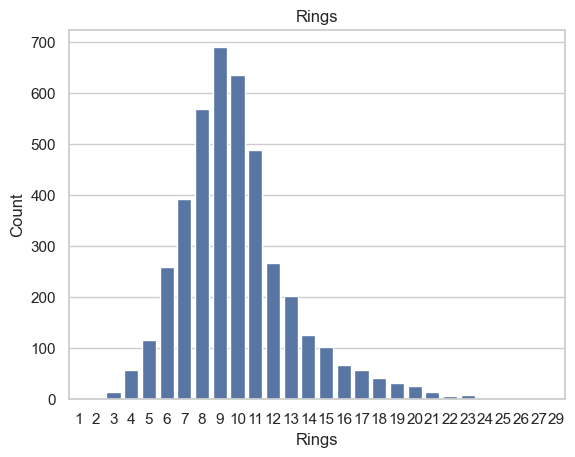

In [162]:
sns.countplot(data = df, x="Rings")
plt.xlabel("Rings")
plt.ylabel("Count")
plt.title("Rings")

In [163]:
df['Rings'].value_counts().sort_index()

Rings
1       1
2       1
3      15
4      57
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
21     14
22      6
23      9
24      2
25      1
26      1
27      2
29      1
Name: count, dtype: int64

In [164]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [165]:
df = df.dropna()
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

C:\Users\calix\AppData\Local\Temp\ipykernel_32376\1191235279.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Whole_weight'], kde = True, hist = False, ax=ax1)
C:\Users\calix\AppData\Local\Temp\ipykernel_32376\1191235279.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Shu

<Axes: xlabel='Shucked_weight', ylabel='Density'>

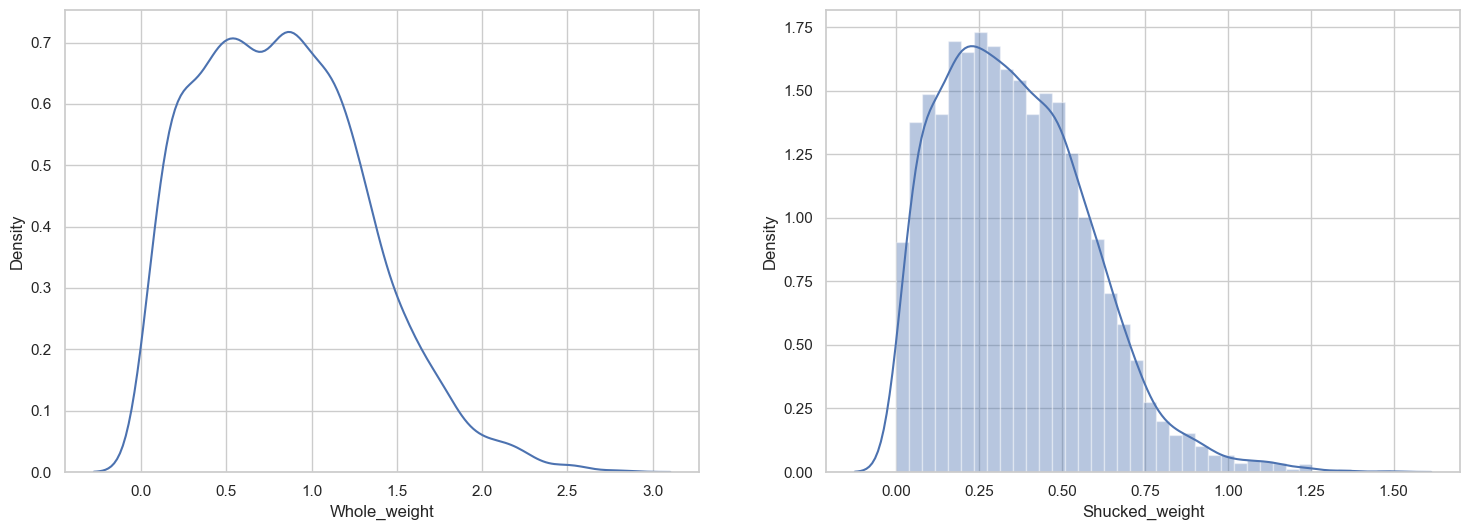

In [166]:
figure = plt.figure(figsize=(18,6))
ax1 = plt.subplot(1,2,1)
sns.distplot(df['Whole_weight'], kde = True, hist = False, ax=ax1)
ax2 = plt.subplot(1,2,2)
sns.distplot(df['Shucked_weight'], ax=ax2)

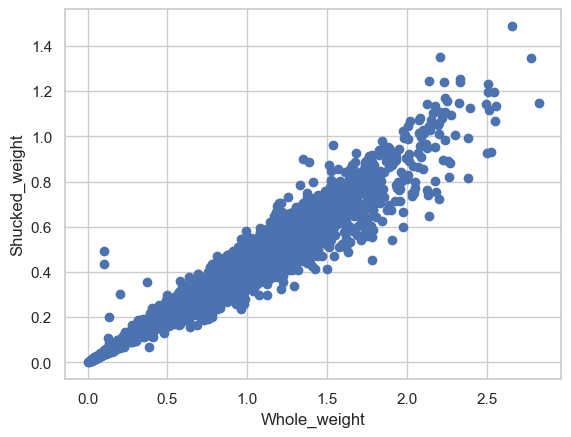

In [167]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(df['Whole_weight'], df['Shucked_weight'])
plt.xlabel('Whole_weight')
plt.ylabel('Shucked_weight')

plt.show()

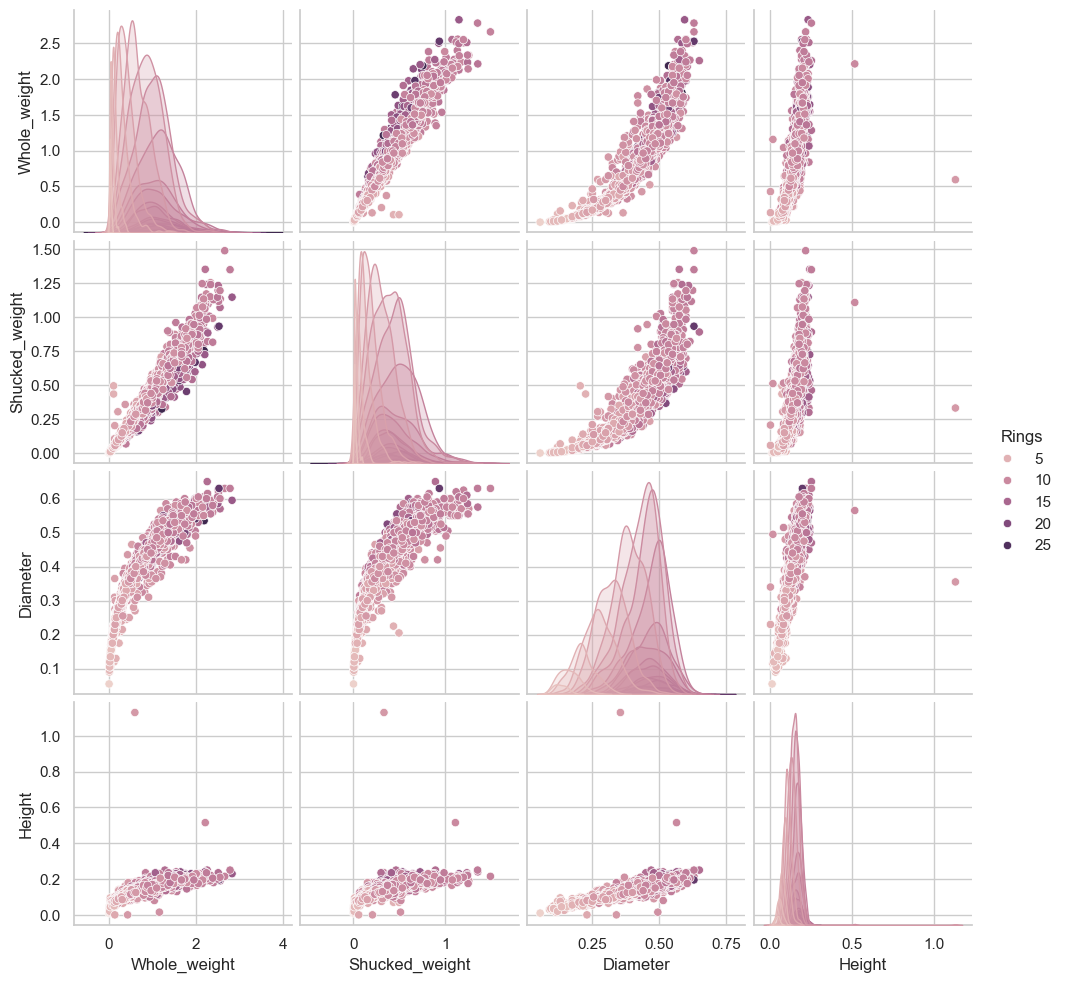

In [168]:
sns.pairplot(df,
             vars=['Whole_weight', 'Shucked_weight', 'Diameter', 'Height'],
            hue ='Rings')
plt.show()

C:\Users\calix\AppData\Local\Temp\ipykernel_32376\239028909.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Shucked_weight", data=df, palette="Set3")


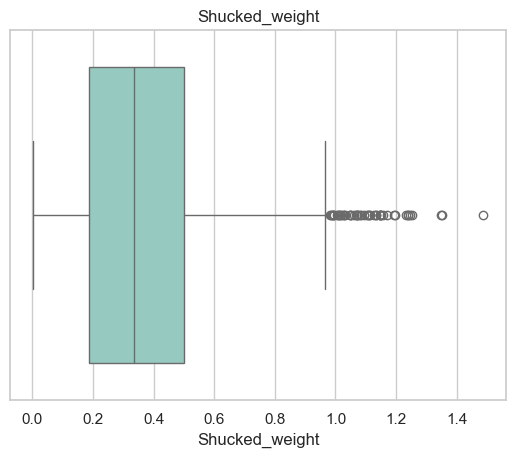

In [169]:
sns.set_theme(style="whitegrid")
sns.boxplot(x="Shucked_weight", data=df, palette="Set3")
plt.title("Shucked_weight")
plt.show()

C:\Users\calix\AppData\Local\Temp\ipykernel_32376\111277950.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


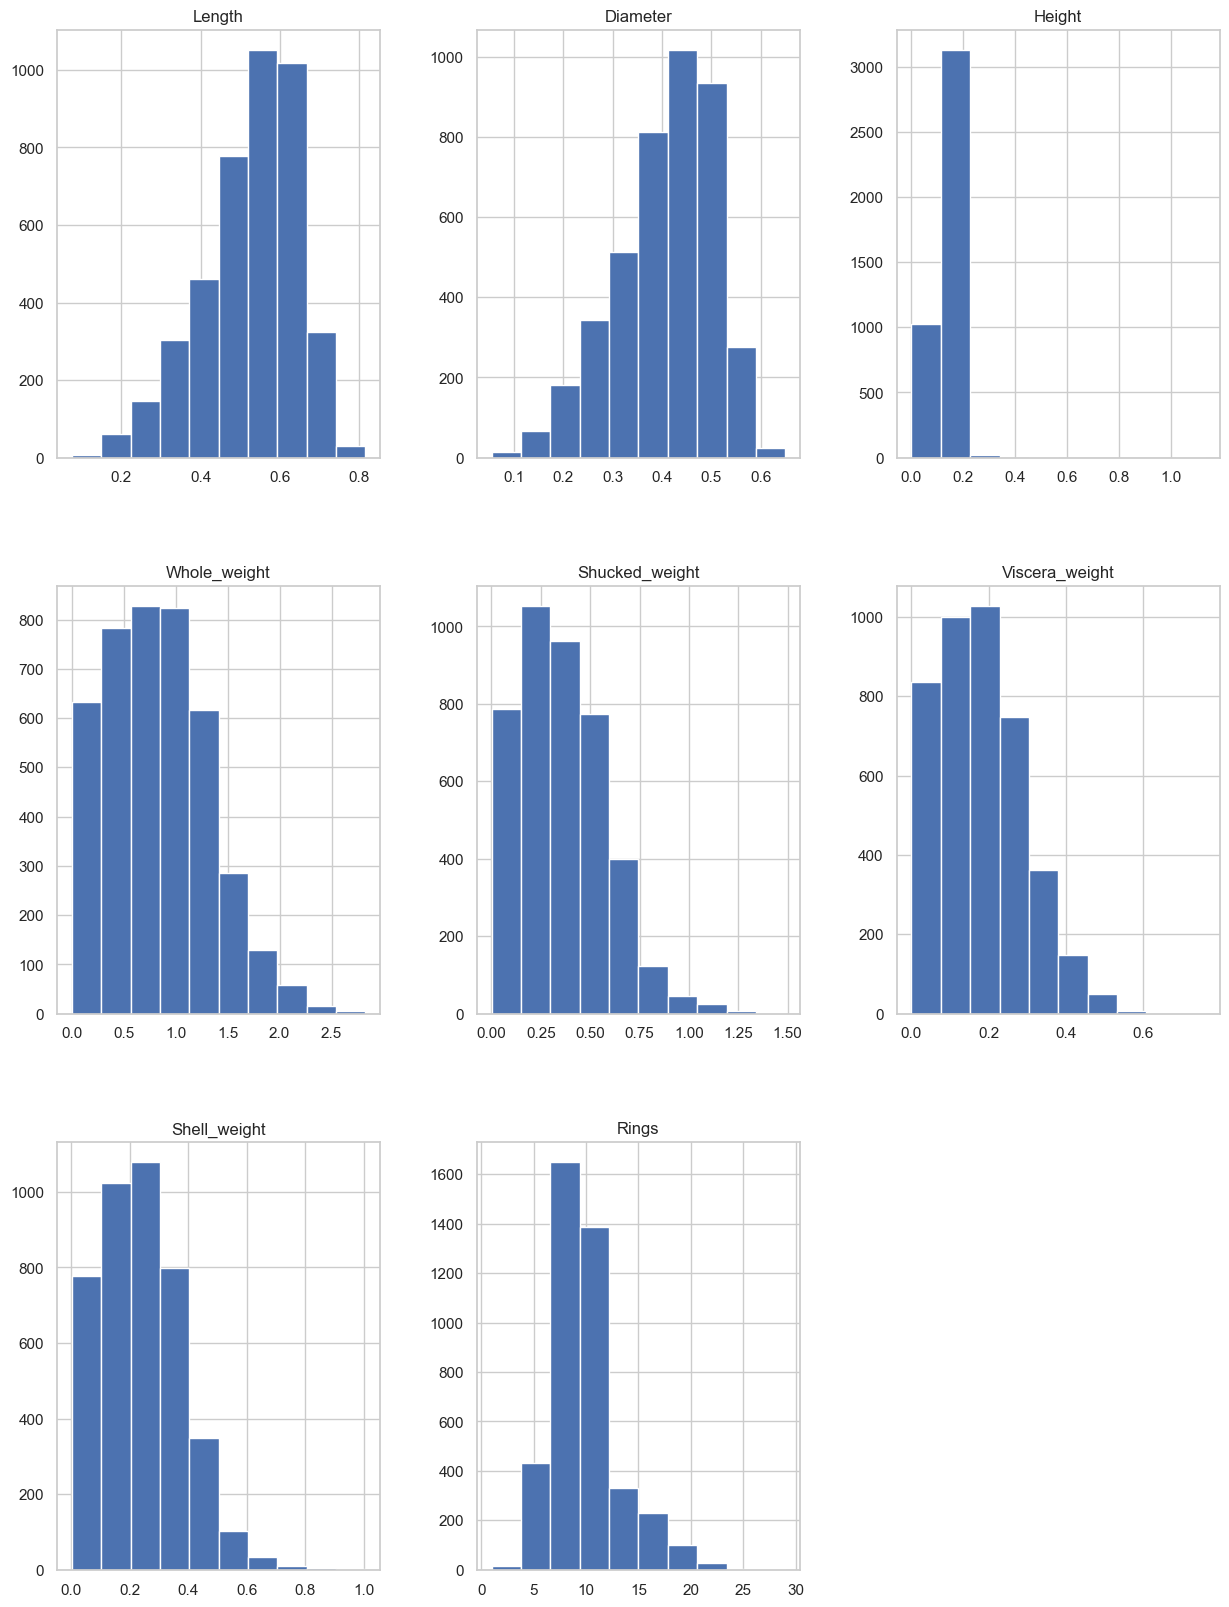

In [170]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

In [171]:
X=df.drop('Rings',axis=1)
X.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
id,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [172]:
y=df['Rings']
y.value_counts().sort_index()

Rings
1       1
2       1
3      15
4      57
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
21     14
22      6
23      9
24      2
25      1
26      1
27      2
29      1
Name: count, dtype: int64

In [173]:
y.head()

id
0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

In [174]:
Y = pd.get_dummies(y).values

In [175]:
X = X.values

In [176]:
X

array([['M', 0.455, 0.365, ..., 0.2245, 0.101, 0.15],
       ['M', 0.35, 0.265, ..., 0.0995, 0.0485, 0.07],
       ['F', 0.53, 0.42, ..., 0.2565, 0.1415, 0.21],
       ...,
       ['M', 0.6, 0.475, ..., 0.5255, 0.2875, 0.308],
       ['F', 0.625, 0.485, ..., 0.531, 0.261, 0.296],
       ['M', 0.71, 0.555, ..., 0.9455, 0.3765, 0.495]], dtype=object)

In [177]:
y

id
0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

In [178]:
Y

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [179]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X)

In [180]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X_encoded,Y,test_size=0.2,random_state=0) 

In [205]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(10,input_shape=(6049,),activation='tanh'))
model.add(Dense(8,activation='tanh'))
model.add(Dense(6,activation='tanh'))
model.add(Dense(28,activation='softmax'))

model.compile(Adam(learning_rate=0.04),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

C:\Users\calix\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_37 (Dense)                     │ (None, 10)                  │          60,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 8)                   │              88 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 6)                   │              54 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 28)                  │             196 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 60,838 (237.65 KB)

 Trainable params: 60,838 (237.65 KB)

 Non-trainable params: 0 (0.00 B)

In [209]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1732 - loss: 2.5259 - val_accuracy: 0.2488 - val_loss: 2.1885
Epoch 2/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - accuracy: 0.2986 - loss: 1.9944 - val_accuracy: 0.2476 - val_loss: 2.3672
Epoch 3/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - accuracy: 0.3944 - loss: 1.7362 - val_accuracy: 0.2129 - val_loss: 2.5154
Epoch 4/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - accuracy: 0.4861 - loss: 1.5435 - val_accuracy: 0.2105 - val_loss: 2.7481
Epoch 5/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5631 - loss: 1.3507 - val_accuracy: 0.2225 - val_loss: 2.9425
Epoch 6/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6127 - loss: 1.2675 - val_accuracy: 0.1866 - val_loss: 3.1668
Epoch 7/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - accuracy: 0.6326 - loss: 1.2246 - val_accuracy: 0.2022 - val_loss: 3.4809
Epoch 8/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6969 - loss: 1.0551 - val_accu

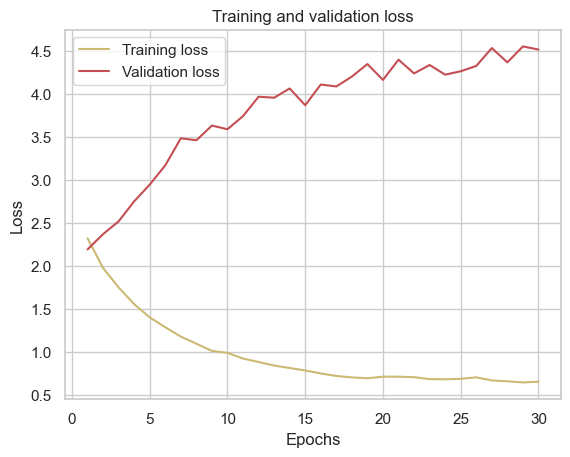

In [211]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

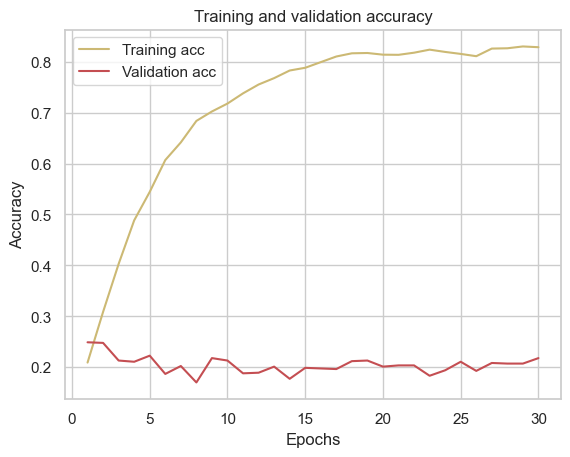

In [215]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           2       0.50      0.40      0.44         5
           3       0.20      0.18      0.19        11
           4       0.40      0.30      0.34        33
           5       0.21      0.23      0.22        47
           6       0.40      0.27      0.32        98
           7       0.27      0.30      0.28       113
           8       0.24      0.26      0.25       127
           9       0.19      0.29      0.23       107
          10       0.19      0.15      0.17        95
          11       0.20      0.26      0.23        66
          12       0.03      0.03      0.03        39
          13       0.03      0.04      0.04        26
          14       0.00      0.00      0.00        18
          15       0.00      0.00      0.00        14
          16       0.00      0.00      0.00        10
          17       0.00      0.00      0.00         5
          18       0.00      0.00      0.00         8
          19       0.00    

C:\Users\calix\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\calix\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\calix\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
